In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Data processing
try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    #df = data frame
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0, 2]].values


From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


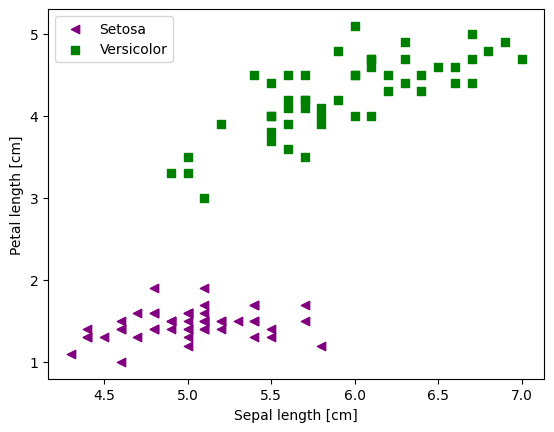

In [41]:
#Scatter plot
#.scatter create a scatter plot 
#color='purple' sets the color of the markers to purple
#Different type of markers refers to README.md
#label='Setosa' set the label for this data
plt.scatter(X[:50, 0], X[:50, 1],color='purple', marker='<', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='green', marker='s', label='Versicolor')

#Setting label
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')

# Adding a legend to the plot
#A legend is used to identify data
#in visualizations by its color, size, or other distinguishing features
# loc='upper left' positions the legend in the upper left corner of the plot
plt.legend(loc='upper left')

# Displaying the plot
plt.show()

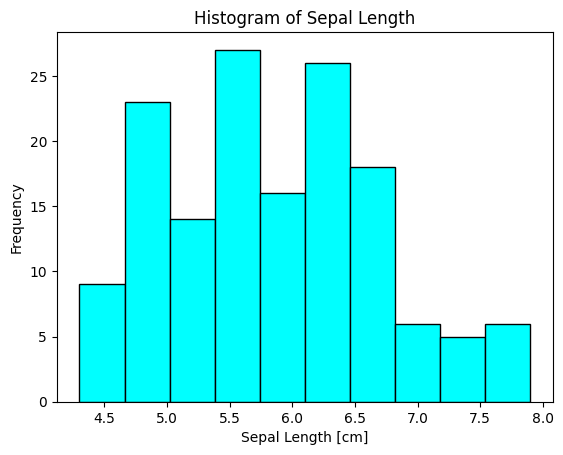

In [46]:
#Histogram
# plt.hist() creates a histogram.
# bins=10 specifies the number of bins (intervals) in the histogram.
#Ex: theres 100 data here, so 100/10 = 10 bars
plt.hist(df[0], bins=10, color='cyan', edgecolor='black')


plt.xlabel('Sepal Length [cm]')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()


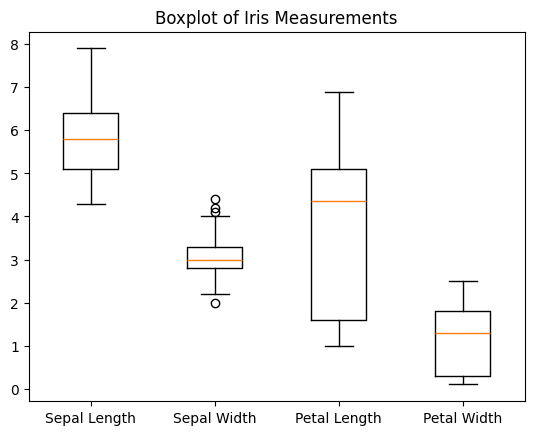

In [47]:
#Boxplot
# plt.boxplot() creates a boxplot.
# [df[0], df[1], df[2], df[3]] is a list of data series to be plotted.
plt.boxplot([df[0], df[1], df[2], df[3]])
plt.xticks([1, 2, 3, 4], ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.title('Boxplot of Iris Measurements')
plt.show()

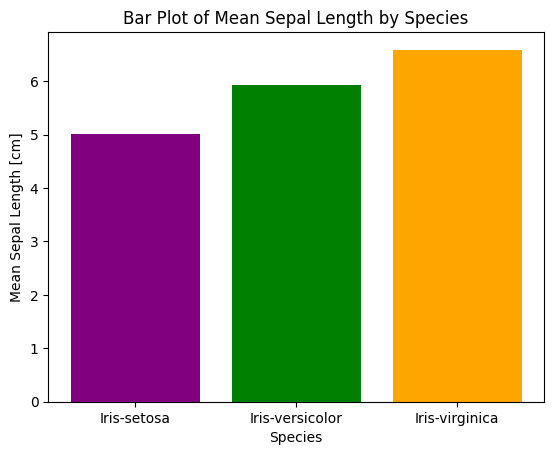

In [5]:
#Bar plot
#The mean of first column grouped by species
#at column 4, groupy means all rows with same species value are collected
#iloc ->interger location 
means = df.groupby(4).mean().iloc[:, 0]  


plt.bar(means.index, means.values, color=['purple', 'green', 'orange'])
plt.xlabel('Species')
plt.ylabel('Mean Sepal Length [cm]')
plt.title('Bar Plot of Mean Sepal Length by Species')
plt.show()

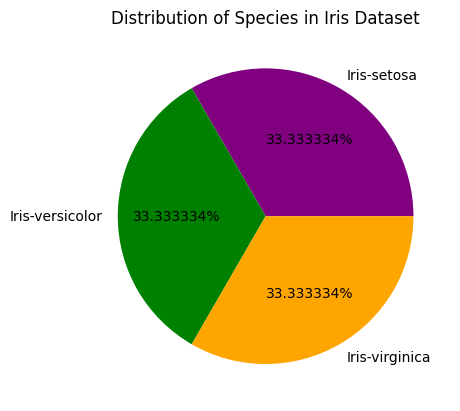

In [48]:
#Pie chart
species_counts = df[4].value_counts()

# plt.pie() creates a pie chart.
# autopct='%1.1f%%' formats the percentage labels on the slices.

plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', colors=['purple', 'green', 'orange'])
plt.title('Distribution of Species in Iris Dataset')
plt.show()

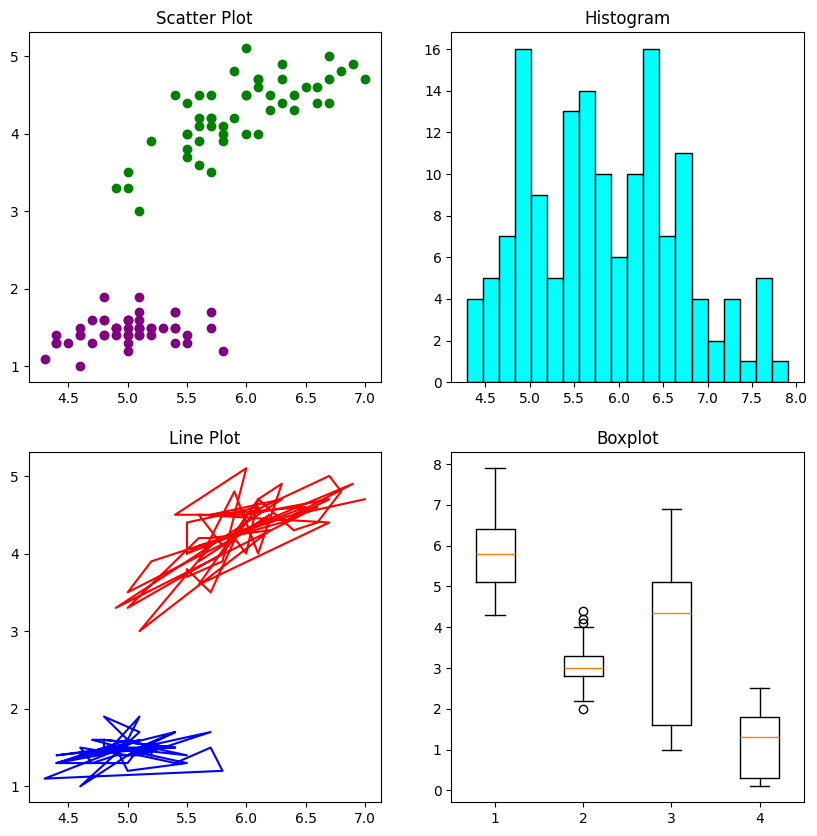

In [55]:
#Subplot

# plt.subplots() creates a figure and a 2x2 grid of subplots.
# figsize=(10, 10) sets the size of the figure.
fig, axes = plt.subplots(2, 2, figsize=(10, 10))


# Scatter plot
axes[0, 0].scatter(X[:50, 0], X[:50, 1], color='purple', label='Setosa')
axes[0, 0].scatter(X[50:100, 0], X[50:100, 1], color='green', label='Versicolor')
axes[0, 0].set_title('Scatter Plot')
# Histogram
axes[0, 1].hist(df[0], bins=20, color='cyan', edgecolor='black')
axes[0, 1].set_title('Histogram')
# Line plot
axes[1, 0].plot(X[:50, 0], X[:50, 1], color='blue', label='Setosa')
axes[1, 0].plot(X[50:100, 0], X[50:100, 1], color='red', label='Versicolor')
axes[1, 0].set_title('Line Plot')
# Boxplot
axes[1, 1].boxplot([df[0], df[1], df[2], df[3]])
axes[1, 1].set_title('Boxplot')

#plt.tight_layout() adjusts the subplots to fit into the figure area.
#plt.tight_layout()
plt.show()



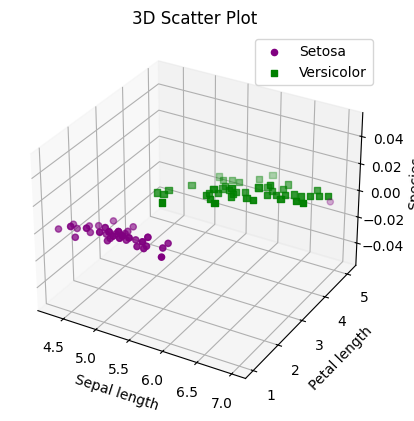

In [6]:
from mpl_toolkits.mplot3d import Axes3D
# Create a new figure
fig = plt.figure()


# Add a 3D subplot
# 111 means 1x1 grid, first subplot.
# projection='3d' specifies that this is a 3D plot.


ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:50, 0], X[:50, 1], c='purple', marker='o', label='Setosa')
ax.scatter(X[50:100, 0], X[50:100, 1], c='green', marker='s', label='Versicolor')

ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot')
plt.tight_layout()
plt.legend()
plt.show()


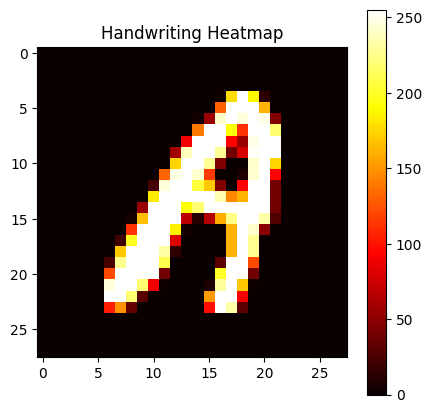

In [5]:
#handwriting 
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("A_Z Handwritten Data.csv")
data.head()
pixel_data =  data.iloc[0].drop('0').values
# Reshape the data to image dimensions 
image_array = pixel_data.reshape(28, 28)

# Display the image
plt.figure(figsize=(5,5))
plt.imshow(image_array, cmap='cool')
plt.imshow(image_array, cmap='hot', interpolation='nearest')
plt.title('Handwriting Heatmap')
plt.colorbar()

plt.show()



C:\Users\2005f\AppData\Local\Temp\ipykernel_18144\2238728439.py:59: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.5, wspace=0.5)


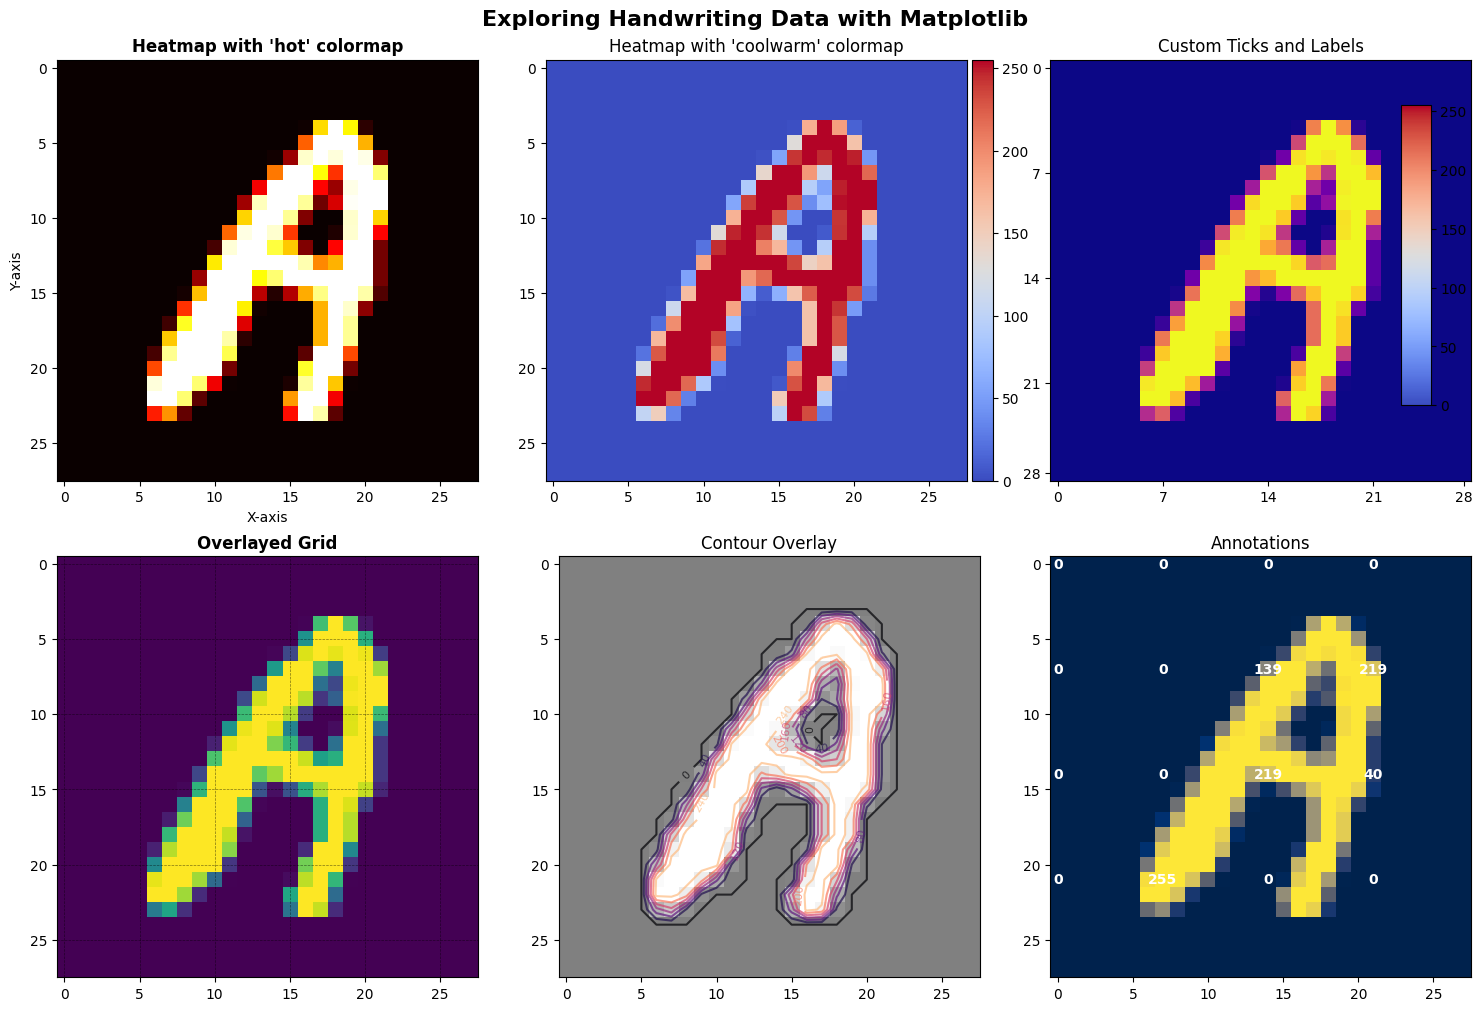

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load and prepare data
data = pd.read_csv("A_Z Handwritten Data.csv")
pixel_data = data.iloc[0, 1:].values  # Assuming the first column is the label, skip it
image_array = pixel_data.reshape(28, 28)  # Reshape for the 28x28 image

# Create a figure with multiple subplots to showcase various features
fig, axs = plt.subplots(2, 3, figsize=(15, 10), constrained_layout=True)

# Feature 1: Basic heatmap with 'hot' colormap
axs[0, 0].imshow(image_array, cmap='hot', interpolation='nearest')
axs[0, 0].set_title("Basic Heatmap - 'hot'")
axs[0, 0].set_xlabel("X-axis")
axs[0, 0].set_ylabel("Y-axis")

# Feature 2: Heatmap with different colormap and colorbar
im = axs[0, 1].imshow(image_array, cmap='coolwarm')
axs[0, 1].set_title("Heatmap with 'coolwarm' colormap")
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)

# Feature 3: Custom ticks and tick formatting
axs[0, 2].imshow(image_array, cmap='plasma')
axs[0, 2].set_xticks([0, 7, 14, 21, 27])
axs[0, 2].set_yticks([0, 7, 14, 21, 27])
axs[0, 2].set_xticklabels(['0', '7', '14', '21', '28'])
axs[0, 2].set_yticklabels(['0', '7', '14', '21', '28'])
axs[0, 2].set_title("Custom Ticks and Labels")

# Feature 4: Grid with specific line style and alpha
axs[1, 0].imshow(image_array, cmap='viridis')
axs[1, 0].set_title("Image with Grid")
axs[1, 0].grid(which='both', color='black', linestyle='--', linewidth=0.5, alpha=0.5)

# Feature 5: Contour plot overlaid on the image
contour = axs[1, 1].contour(image_array, cmap='magma', alpha=0.7)
axs[1, 1].imshow(image_array, cmap='gray', alpha=0.5)
axs[1, 1].set_title("Contour Overlay")
axs[1, 1].clabel(contour, inline=1, fontsize=8)

# Feature 6: Annotate certain regions
axs[1, 2].imshow(image_array, cmap='cividis')
axs[1, 2].set_title("Annotations")
for i in range(0, 28, 7):
    for j in range(0, 28, 7):
        axs[1, 2].text(j, i, f'{image_array[i, j]:.0f}', color="white", ha="center", va="center", fontweight="bold")

# Feature 7: Add titles and subtitles
fig.suptitle("Exploring Handwriting Data with Matplotlib", fontsize=16, fontweight='bold')
axs[0, 0].set_title("Heatmap with 'hot' colormap", fontweight='bold')
axs[1, 0].set_title("Overlayed Grid", fontweight='bold')

# Feature 8: Subplot adjustment
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Feature 9: Add a shared color bar across subplots (Top row)
cbar_ax = fig.add_axes([0.93, 0.6, 0.02, 0.3])
fig.colorbar(im, cax=cbar_ax, orientation="vertical")

# Feature 10: Save the figure to a file
plt.savefig("Handwriting_data_visualization.png", dpi=300, bbox_inches="tight")

# Show the figure with all plots
plt.show()


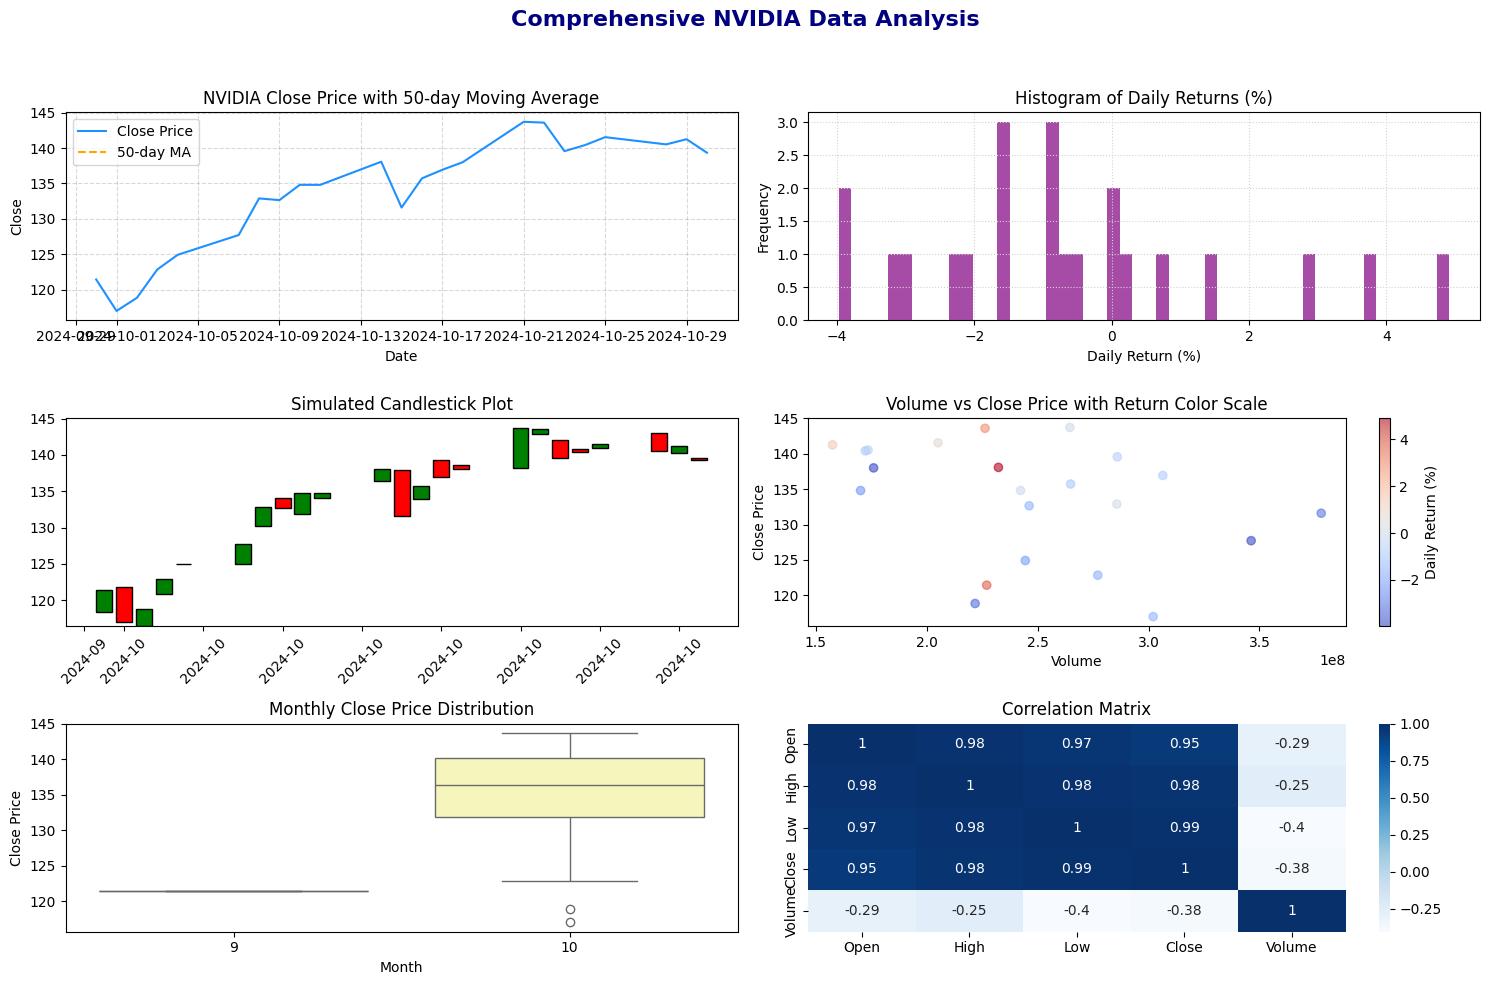

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.dates import DateFormatter

# Load CSV data and clean 'Volume' column
data = pd.read_csv("nvdiastock.csv")
data['Date'] = pd.to_datetime(data['Date'])  # Adjust column name as necessary
data['Volume'] = pd.to_numeric(data['Volume'].replace(',', '', regex=True))  # Clean Volume

# Set up the overall figure
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle("Comprehensive NVIDIA Data Analysis", fontsize=16, fontweight='bold', color="navy")

# Line Plot with Moving Average
sns.lineplot(ax=ax[0, 0], x=data['Date'], y=data['Close'], label="Close Price", color="dodgerblue")
data['MA50'] = data['Close'].rolling(50).mean()
ax[0, 0].plot(data['Date'], data['MA50'], label="50-day MA", color="orange", linestyle="--")
ax[0, 0].set_title("NVIDIA Close Price with 50-day Moving Average")
ax[0, 0].legend()
ax[0, 0].grid(visible=True, linestyle="--", color="gray", alpha=0.3)

# Histogram of Daily Returns
data['Daily_Return'] = data['Close'].pct_change() * 100
ax[0, 1].hist(data['Daily_Return'].dropna(), bins=50, color="purple", alpha=0.7)
ax[0, 1].set_title("Histogram of Daily Returns (%)")
ax[0, 1].set_xlabel("Daily Return (%)")
ax[0, 1].set_ylabel("Frequency")
ax[0, 1].grid(True, linestyle=":", color="lightgray")

# Candlestick-style Plot
open_price = data['Open']
close_price = data['Close']
color = np.where(close_price >= open_price, 'g', 'r')
ax[1, 0].bar(data['Date'], close_price - open_price, bottom=open_price, color=color, edgecolor='k', width=0.8)
ax[1, 0].set_title("Simulated Candlestick Plot")
ax[1, 0].xaxis.set_major_formatter(DateFormatter("%Y-%m"))
ax[1, 0].tick_params(axis="x", rotation=45)

# Scatter Plot with Annotations
scatter_plot = ax[1, 1].scatter(data['Volume'], data['Close'], c=data['Daily_Return'], cmap='coolwarm', alpha=0.6)
ax[1, 1].set_title("Volume vs Close Price with Return Color Scale")
ax[1, 1].set_xlabel("Volume")
ax[1, 1].set_ylabel("Close Price")
fig.colorbar(scatter_plot, ax=ax[1, 1], label="Daily Return (%)")

# Boxplot for Monthly Analysis
data['Month'] = data['Date'].dt.month
sns.boxplot(ax=ax[2, 0], x='Month', y='Close', data=data, hue='Month', palette="Set3", dodge=False)
ax[2, 0].set_title("Monthly Close Price Distribution")
ax[2, 0].set_xlabel("Month")
ax[2, 0].set_ylabel("Close Price")
ax[2, 0].legend().set_visible(False)

# Heatmap of Correlations
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", ax=ax[2, 1])
ax[2, 1].set_title("Correlation Matrix")

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



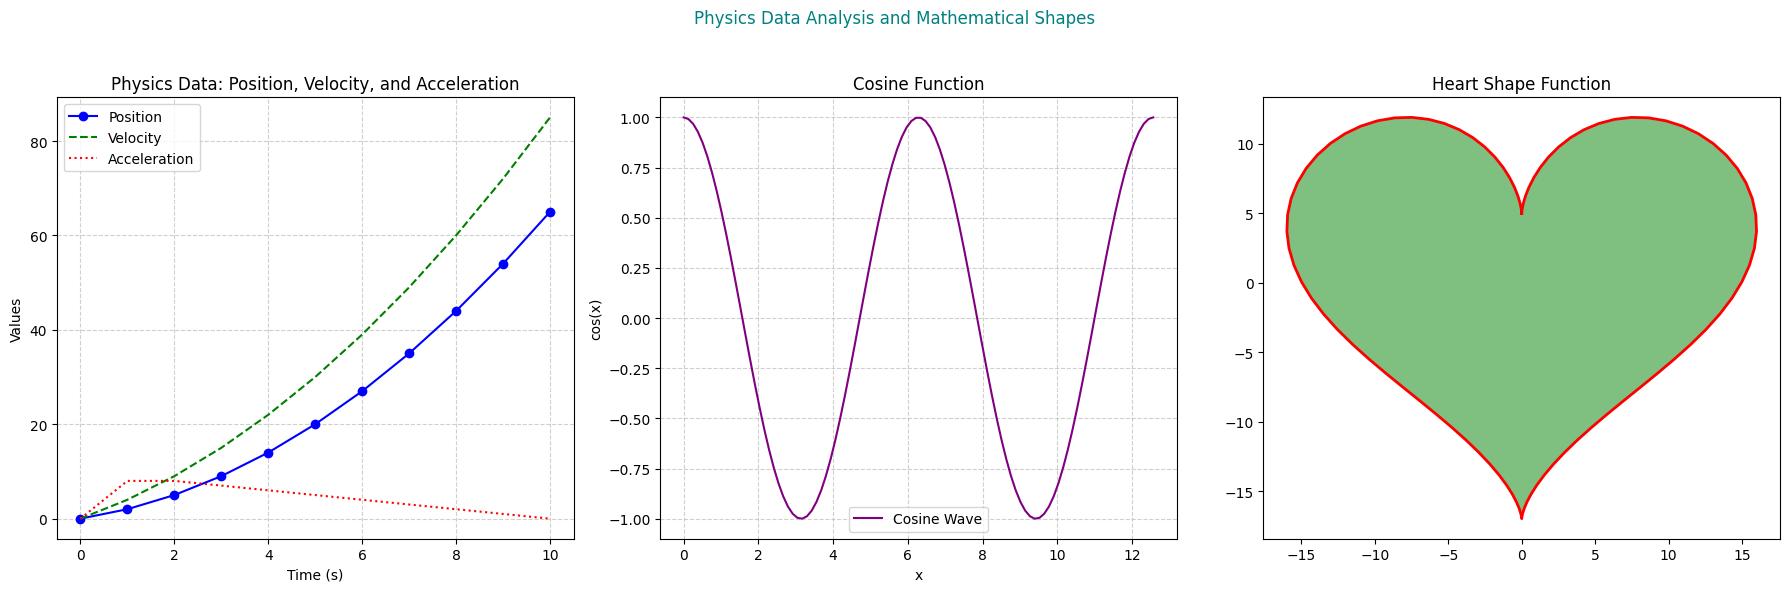

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv("physics_data.csv")
# Set up a figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Physics Data Analysis and Mathematical Shapes", color="teal")

# Physics Data Plot: Position vs. Time
ax1.plot(data['Time'], data['Position'], label="Position", color="blue", marker='o')
ax1.plot(data['Time'], data['Velocity'], label="Velocity", color="green", linestyle="--")
ax1.plot(data['Time'], data['Acceleration'], label="Acceleration", color="red", linestyle=":")
ax1.set_title("Physics Data: Position, Velocity, and Acceleration")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Values")
ax1.legend()
ax1.grid(True, linestyle="--", alpha=0.6)

# Cosine Function Plot
x_cos = np.linspace(0, 4 * np.pi, 100)
y_cos = np.cos(x_cos)
ax2.plot(x_cos, y_cos, label="Cosine Wave", color="purple")
ax2.set_title("Cosine Function")
ax2.set_xlabel("x")
ax2.set_ylabel("cos(x)")
ax2.legend()
ax2.grid(True, linestyle="--", alpha=0.6)

# Heart Shape Plot
t = np.linspace(0, 2 * np.pi, 100)
x_heart = 16 * np.sin(t)**3
y_heart = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)
ax3.plot(x_heart, y_heart, color="red", lw=2)
ax3.fill(x_heart, y_heart, color="green", alpha=0.5)

ax3.set_title("Heart Shape Function")



# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
